In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from sklearn import datasets
from sklearn.model_selection import train_test_split
from termcolor import colored
from sklearn.utils import shuffle

In [249]:
ds = datasets.load_digits()
# ds = pd.DataFrame(data = np.c_[ds.data, ds.target, ds.target_names, ds.images, ds.DESCR])
ds.keys()
ds1 = ds.data
tar = ds.target.reshape(1797, 1)
ds1 = pd.DataFrame(data = ds1)
tar = np.array(tar)

# Visualising the digits in 8x8 grid

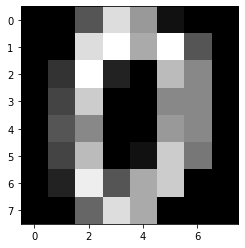

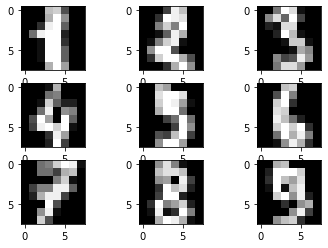

In [250]:
plt.imshow(ds1.loc[0].values.reshape((8,8)), cmap='gray')
plt.show()
for i in range(1,10):
    plt.subplot(330 + i)
    plt.imshow(ds1.loc[i].values.reshape((8,8)), cmap='gray')
plt.show()

# Visualise the distribution of 0's and 1's in 3D space by dimensionality reduction

   ## Use SVD to obtain top 3 significant components

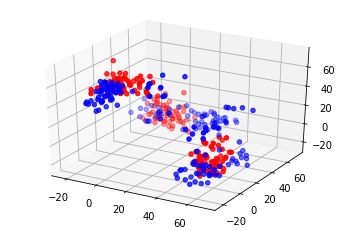

In [251]:
tar1 = tar.reshape(tar.shape[0],)
ds_0 = ds1[tar==0]
ds_1 = ds1[tar==1]

from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

SVD_ = TruncatedSVD(n_components=3)
svd_0 = SVD_.fit_transform(ds_0.values)
svd_0 = svd_0.reshape(3,178)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(svd_0[0], svd_0[1], svd_0[2], color='r')

SVD_ = TruncatedSVD(n_components=3)
svd_1 = SVD_.fit_transform(ds_1.values)
svd_1 = svd_1.reshape(3, svd_1.shape[0])
ax.scatter(svd_1[0], svd_1[1], svd_1[2], color='b')
plt.show()

# Question 1 (a) : Binary classification of MNIST digits using LDA

#### Select the subset of the dataset with 0's and 1's from mnist digits

In [285]:
imgs_0 = ds_0.values[:-10]
imgs_1 = ds_1.values[:-10]

test_imgs_0 = ds_0.values[-10:]
test_imgs_1 = ds_1.values[-10:]

u_0 = np.mean(imgs_0, axis=0)
u_1 = np.mean(imgs_1, axis=0)

n0 = imgs_0.shape[0]
n1 = imgs_1.shape[0]


X0 = (imgs_0 - u_0.reshape(1, 64))

cov_x0 = 0

for x in X0:
    x = x.reshape(x.shape[0], 1)
    cov_x0 += np.matmul(x, x.T)    
    
X1 = (imgs_1 - u_1.reshape(1, 64))

cov_x1 = 0

for x in X1:
    x = x.reshape(x.shape[0], 1)
    cov_x1 += np.matmul(x, x.T)

cov_x1x2 = (cov_x0 + cov_x1)/(n0 + n1)

pi_1 = n0/(n0+n1)
pi_2 = n1/(n0+n1)

u = np.array([u_0, u_1])

cov_inv = np.linalg.pinv(cov_x1x2)

def calc_post(x, cls):
    x = x.reshape(x.shape[0],1)
    x = x - u[cls].reshape(64, 1)
    return (np.log(pi_1) - (0.5)*np.matmul(x.T, np.matmul(cov_inv, x))).reshape(1,)

n1,n2 = 0,0

test_imgs = np.concatenate((test_imgs_0, test_imgs_1))
test_labels = np.concatenate((np.zeros(10), np.ones(10)))

a = np.arange(0,20,1)
np.random.shuffle(a)

test_imgs = test_imgs[a]
test_labels = test_labels[a]

print("Class 0 test set performance (log scale probabilities)\n")
print("Correct\tPredicted\tclass_0_posterior\tclass_1_posterior\n")

i=0
num_correct=0
for img in test_imgs:
    correct_label = int(test_labels[i])
    pos_0 = calc_post(img, 0)[0]
    pos_1 = calc_post(img, 1)[0]
    
    if(pos_0>pos_1):
        pred_label = 0
    else:
        pred_label = 1
    
    if(correct_label == pred_label):
        num_correct+=1
        print(
              str(correct_label) + "\t" +
              str(pred_label) + "\t\t" +
              str(pos_0)+ "\t" +
              str(pos_1))
    else:
        print(
              "\t\033[1m"+
              str(correct_label) + "\t" +
              str(pred_label) + "\t\t" +
              str(pos_0)+ "\t" + 
              str(pos_1) + 
              "\t\033[0m")
        
    i+=1
print("\nTest set accuracy is {}\n\n\n".format(num_correct/20))

Class 0 test set performance (log scale probabilities)

Correct	Predicted	class_0_posterior	class_1_posterior

0	0		-27.765826523443582	-93.31848261309192
1	1		-112.58049370479385	-29.652635905853995
0	0		-50.619216641657744	-121.49693169844376
0	0		-35.09441265020832	-103.73023883527706
0	0		-26.656409994908966	-87.6824529830834
0	0		-66.68548855283233	-138.11953322140897
1	1		-100.44527583580911	-21.625884480403517
0	0		-18.86249661433383	-111.77195962096248
0	0		-27.281573973272412	-93.49953374451368
1	1		-78.17353324039875	-28.713862797883166
0	0		-24.7384553520814	-118.87038891627219
1	1		-108.08235069588294	-34.85625194319944
0	0		-39.85384742235382	-123.00921749331714
1	1		-97.65109336005146	-35.76420878568773
1	1		-302.6936703891137	-280.4456577207296
1	1		-135.91144922221952	-47.469921217013734
1	1		-100.8758391642869	-41.23742725911503
1	1		-96.16446761490828	-24.68893168942494
0	0		-70.35891820350182	-149.0616939712006
1	1		-84.5493383969797	-35.14600216673923

Test set accu

# Question 1(b) : Multiclass classification on MNIST digits using LDA

In [238]:
ds_1 = pd.DataFrame(data=np.c_[ds.data, ds.target])
ds_1 = shuffle(ds_1)

train,test = train_test_split(ds_1, test_size=0.1)

train_imgs = train[range(64)]
train_labels = train[64]

test_imgs = test[range(64)]
test_labels = test[64]

train_imgs = np.array(train_imgs)
train_labels = np.array(train_labels)

test_imgs = np.array(test_imgs)
test_labels = np.array(test_labels)

u = np.zeros((10, 64))
num_imgs = np.zeros((10,1))

cov = 0
for i in range(10):
    class_set = train_imgs[train_labels==i]
    num_imgs[i] = len(class_set)
    u[i] = np.mean(class_set, axis=0)
    
    cov_x = 0
    for x in class_set:
        x = (x - u[i]).reshape(64,1)
        cov_x += np.matmul(x, x.T)
    cov+=cov_x

cov = cov/np.sum(num_imgs)

cov_inv = np.linalg.pinv(cov)


def calc_post(x, cls):
    x = x.reshape(x.shape[0],1)
    x = x - u[cls].reshape(64, 1)
    return (np.log(pi_1) - (0.5)*np.matmul(x.T, np.matmul(cov_inv, x))).reshape(1,)


print("Test set performance for multiclass classification using LDA")
print("Correct \tPredicted")

n1,n2 = 0,0
i=0
correct=0
for img in test_imgs:
    correct_label = int(test_labels[i])
    posteriors = np.zeros(10)
    for cls in range(10):
        posteriors[cls] = calc_post(img, cls)
    
    pred_class = np.argmax(posteriors)
    
    if(correct_label == pred_class):
        print(colored(str(correct_label) + '\t\t' + str(pred_class), 'green'))
        correct+=1
    else:
        print("\033[1m" + colored(str(correct_label) + '\t\t' + str(pred_class), 'red') + "\033[0m") 
    i+=1
print("test set accuracy for multiclass classification is {}".format(correct/i))


Test set performance for multiclass classification using LDA
Correct 	Predicted
6		6
2		2
3		3
4		4
7		7
6		6
4		4
8		8
6		6
9		8
1		1
2		2
5		5
9		9
2		2
4		4
7		7
3		3
2		2
0		0
5		5
8		8
7		7
2		2
5		5
5		5
0		0
3		3
6		6
0		0
8		9
2		2
7		7
5		5
5		5
1		1
3		3
0		0
8		8
3		3
2		2
8		8
5		5
1		1
8		8
2		2
0		0
2		2
4		4
1		1
5		5
3		3
3		3
2		2
6		6
2		2
4		4
7		7
5		5
9		9
4		9
8		1
4		4
1		1
0		0
3		3
4		1
6		6
2		2
9		9
0		0
6		6
5		5
8		8
4		4
1		1
0		0
8		8
8		8
0		0
0		0
9		9
1		1
9		9
4		4
9		9
6		6
6		6
5		5
9		9
3		3
4		4
9		9
7		7
7		7
0		0
4		4
9		9
0		0
7		7
5		5
6		9
2		2
9		9
9		9
9		9
2		2
0		0
2		2
0		0
7		7
4		4
1		1
0		0
2		2
1		1
5		5
9		9
5		5
4		4
1		1
9		9
2		2
0		0
8		8
4		4
4		4
6		6
3		3
6		6
2		2
4		4
9		9
6		6
9		9
8		8
1		1
9		9
6		6
3		3
9		9
3		3
6		6
1		1
9		9
7		7
9		9
2		2
3		2
3		3
3		3
5		5
0		0
6		6
4		4
1		1
8		8
3		3
4		4
0		0
1		1
3		3
4		4
5		5
2		2
1		1
7		7
8		8
0		0
6		6
0		0
5		5
2		2
5		5
7		7
7		7
8		8
6		6
1		1
3		3
test set accuracy fo

# Question 2: Multiclass classification on MNIST digits using QDA

In [244]:
ds_1 = pd.DataFrame(data=np.c_[ds.data, ds.target])
ds_1 = shuffle(ds_1)

train,test = train_test_split(ds_1, test_size=0.1)

train_imgs = train[range(64)]
train_labels = train[64]

test_imgs = test[range(64)]
test_labels = test[64]

train_imgs = np.array(train_imgs)
train_labels = np.array(train_labels)

test_imgs = np.array(test_imgs)
test_labels = np.array(test_labels)

u = np.zeros((10, 64))
num_imgs = np.zeros((10,1))

cov = []
for i in range(10):
    class_set = train_imgs[train_labels==i]
    num_imgs[i] = len(class_set)
    u[i] = np.mean(class_set, axis=0)
    
    cov_x = 0
    for x in class_set:
        x = (x - u[i]).reshape(64,1)
        cov_x += np.matmul(x, x.T)
    cov_x/=num_imgs[i]
    cov.append(cov_x)
cov = np.array(cov)

cov_inv = []
for cov1 in cov:
    cov_inv.append(np.linalg.pinv(cov1))
cov_inv = np.array(cov_inv)

def calc_post(x, cls):
    x = x.reshape(x.shape[0],1)
    x = x - u[cls].reshape(64, 1)
    return (np.log(pi_1) - (0.5)*np.matmul(x.T, np.matmul(cov_inv[cls], x))).reshape(1,)


print("Test set performance for multiclass classification using QDA")
print("Correct \tPredicted")

n1,n2 = 0,0
i=0
correct=0
for img in test_imgs:
    correct_label = int(test_labels[i])
    posteriors = np.zeros(10)
    for cls in range(10):
        posteriors[cls] = calc_post(img, cls)
    
    pred_class = np.argmax(posteriors)
    
    if(correct_label == pred_class):
        print(colored(str(correct_label) + '\t\t' + str(pred_class), 'green'))
        correct+=1
    else:
        print("\033[1m" + colored(str(correct_label) + '\t\t' + str(pred_class), 'red') + "\033[0m") 
    i+=1
print("test set accuracy for multiclass classification is {}".format(correct/i))


Test set performance for multiclass classification using LDA
Correct 	Predicted
0		0
0		0
4		4
3		3
6		6
1		1
1		1
8		8
7		7
7		7
3		3
4		4
2		2
4		4
0		0
7		7
4		4
4		4
4		4
7		7
4		4
2		2
1		1
7		7
3		3
3		3
9		9
9		8
8		8
9		9
0		0
9		9
8		8
7		7
1		1
2		2
7		7
3		3
6		6
6		6
3		3
3		3
9		9
7		7
9		9
4		4
6		6
0		0
1		1
6		6
7		7
0		0
1		1
7		7
0		0
3		3
0		0
6		6
4		4
0		0
9		9
8		8
0		0
8		8
5		9
7		7
7		7
7		7
1		1
6		6
8		8
1		1
1		1
2		2
4		4
6		6
6		6
6		6
9		9
8		8
5		5
9		9
3		3
0		0
6		6
9		9
3		3
5		5
9		9
8		8
5		5
1		1
6		6
4		4
4		4
6		6
8		8
2		2
7		7
5		5
7		7
5		5
2		2
9		9
5		5
8		8
7		7
9		9
3		3
9		9
5		5
9		9
2		2
9		9
5		5
2		2
7		7
2		2
5		5
6		6
1		1
3		3
7		7
6		6
6		6
4		7
0		0
7		7
9		9
5		5
4		4
4		4
6		6
3		3
8		8
1		1
6		6
8		8
6		6
6		6
7		7
1		1
5		5
3		3
9		9
7		7
2		2
4		4
1		1
2		2
2		2
4		4
2		2
7		7
9		9
5		5
3		3
3		3
9		9
2		2
7		7
8		8
1		1
6		6
5		5
6		6
3		3
8		8
0		0
2		2
9		5
7		7
8		8
1		8
7		7
4		4
5		5
0		0
8		8
2		2
test set accuracy fo